In [ ]:
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 60)

# Matplotlib for visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Imputing missing values and scaling values
from sklearn.preprocessing import MinMaxScaler

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
frame_set = pd.read_csv(r'/content/drive/My Drive/CUP_IT_train_data.csv', comment='#') 

In [ ]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [ ]:
missing_values_table(frame_set)

Your selected dataframe has 46 columns.
There are 11 columns that have missing values.


,Missing Values,% of Total Values
mf_volume,4150408,99.7
td_volume,4146870,99.6
cl_balance,4078513,98.0
ml_balance,3982043,95.7
sa_volume,3864303,92.9
cc_balance,2562851,61.6
pl_balance,2262883,54.4
cu_empl_area,773007,18.6
cu_empl_level,495334,11.9
cu_education_level,369055,8.9


In [ ]:
frame_set.corr().sort_values("gi_smooth_3m")

,cif_id,gi_smooth_3m,cu_gender,payroll_f,cur_quantity_pl,cur_quantity_mort,cur_quantity_cc,cur_quantity_deposits,cur_quantity_dc,cur_quantity_accounts,cur_quantity_saccounts,cur_quantity_mf,cc_balance,cl_balance,ml_balance,pl_balance,td_volume,ca_volume,sa_volume,mf_volume,dc_cash_spend_v,dc_cash_spend_c,cc_cash_spend_v,cc_cash_spend_c,dc_pos_spend_v,dc_pos_spend_c,cc_pos_spend_v,cc_pos_spend_c,ca_f,rc_session_qnt_cur_mon,cur_qnt_sms,active,standalone_dc_f,standalone_payroll_dc_f,standalone_nonpayroll_dc_f,salary,cu_age,cu_mob,cu_empl_cur_dur_m,is_married,cu_eduaction_level
pl_balance,-4.694067e-03,-0.740965,-0.033301,-0.064198,-0.184672,0.001484,-0.093277,-0.011636,-0.087366,-0.052126,-0.055296,-0.002487,0.091354,0.074059,0.156691,1.000000,-0.001905,-0.179034,-0.149636,0.057433,-0.128155,-0.070050,-0.040138,-0.022672,-0.113797,-0.071428,-0.091900,-0.061225,-0.004119,-0.090110,-0.078798,-0.010287,0.012446,-0.023901,0.023177,-2.574253e-01,0.020897,-0.005701,0.089578,0.054118,0.000562
ml_balance,-5.574915e-03,-0.594602,-0.016931,-0.088413,0.038027,-0.044732,-0.008884,-0.042045,-0.027790,-0.065868,-0.066447,0.014485,0.052337,0.004545,1.000000,0.156691,-0.648527,-0.081263,-0.050761,-0.096813,-0.062425,-0.049563,-0.005521,0.006451,-0.098787,-0.078305,-0.038248,-0.026611,0.005322,-0.055648,-0.092257,0.010292,0.090890,-0.034698,0.104998,-3.511291e-01,0.108858,0.044643,0.160099,0.038884,0.051784
cc_balance,-2.262703e-03,-0.483914,0.015059,0.084266,0.050947,0.016370,-0.118446,0.017212,0.067944,-0.031536,0.028921,0.008789,1.000000,0.020875,0.052337,0.091354,0.058610,0.058193,0.082854,0.037790,0.037146,0.060006,-0.172954,-0.176008,0.037666,0.052090,-0.219307,-0.184250,0.029652,-0.010158,-0.165126,-0.035455,0.016124,0.027341,0.003897,-7.884669e-02,-0.009598,-0.078239,-0.004352,0.007621,0.009031
cl_balance,-1.012355e-02,-0.285287,0.006051,0.006525,0.009288,0.010512,-0.057309,0.004260,0.000210,-0.023650,-0.004363,0.002752,0.020875,1.000000,0.004545,0.074059,0.195379,-0.036156,-0.156724,-0.133637,-0.004849,0.000931,-0.014060,-0.009572,-0.010523,-0.002141,-0.036923,-0.016579,0.038905,-0.002386,-0.041757,0.054731,0.001238,0.005778,0.000419,-1.983189e-01,0.000203,0.094241,0.021470,-0.009429,0.015744
cu_empl_cur_dur_m,-2.626704e-03,-0.094437,0.000669,-0.084474,-0.082753,-0.046564,-0.002339,0.011362,-0.107351,0.046472,-0.063790,0.021485,-0.004352,0.021470,0.160099,0.089578,-0.162841,0.003130,0.036611,0.035299,-0.032393,-0.049336,-0.004602,0.001059,-0.055999,-0.106183,-0.011944,-0.037152,-0.039113,-0.120901,-0.070804,-0.027100,0.011830,0.035060,-0.005228,-7.474091e-03,0.418558,0.254471,1.000000,0.121834,0.070793
cu_age,-2.965035e-03,-0.036508,0.022591,-0.139343,-0.015902,-0.078074,0.052404,0.005355,-0.084805,0.065403,-0.098104,0.024993,-0.009598,0.000203,0.108858,0.020897,-0.148477,-0.004842,0.023230,0.044982,-0.036151,-0.089828,0.014914,0.016775,-0.107423,-0.191969,-0.004595,-0.035137,-0.024841,-0.184272,-0.065060,-0.011211,0.044914,-0.016105,0.053472,-2.317694e-03,1.000000,0.253560,0.418558,0.174568,0.077604
cu_mob,-2.604946e-04,-0.030014,0.009834,-0.093384,-0.082626,-0.050403,0.067075,0.023333,-0.042339,0.253659,-0.022334,0.032695,-0.078239,0.094241,0.044643,-0.005701,-0.147716,0.029841,0.028834,-0.046386,-0.012322,-0.041152,0.008392,0.010145,-0.015420,-0.069871,0.039178,0.015966,-0.005892,-0.067485,-0.004303,-0.007963,0.044893,0.058217,0.016932,7.252293e-02,0.253560,1.000000,0.254471,0.076082,0.117680
cur_quantity_mf,2.198373e-03,-0.017476,-0.002147,-0.018453,-0.029612,-0.006917,-0.011894,0.015407,-0.022676,0.036625,0.015651,1.000000,0.008789,0.002752,0.014485,-0.002487,-0.036435,0.002457,-0.002344,0.260069,-0.005657,-0.013747,-0.002988,-0.004639,-0.006102,-0.010818,-0.002024,-0.003142,-0.000956,-0.005206,-0.020261,0.012043,-0.022374,-0.008397,-0.018569,5.272867e-03,0.024993,0.032695,0.021485,-0.005559,-0.000057
cur_quantity_deposits,7.153350e-04,-0.005088,-0.011588,0.008429,-0.033435,0.020262,-0.011724,1.000000,0.003779,0.040368,0.021174,0.01

In [ ]:
f_frame = frame_set.fillna(0)

In [ ]:
f_frame.drop(["cu_empl_area", "cu_empl_level", "dlk_cob_date"], axis='columns', inplace=True)

In [ ]:
f_frame['big_city'].astype('str')
f_frame['cu_education_level'].astype('str')
f_frame["big_city"].replace({'MSK': 0, 'SPB': 1, 'MLN': 2, 'OTH': 3}, inplace=True)  #{"a":1} #DONE
f_frame["cu_education_level"].replace({'01. Среднее': 1, '02. Среднее профессиональное': 2, '03. Высшее': 3, '04. Второе высшее, ученая степень': 4}, inplace=True) #DONE
f_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4161783 entries, 0 to 4161782
Data columns (total 43 columns):
cif_id                        int64
gi_smooth_3m                  float64
big_city                      int64
cu_gender                     int64
cu_education_level            int64
payroll_f                     int64
cur_quantity_pl               int64
cur_quantity_mort             int64
cur_quantity_cc               int64
cur_quantity_deposits         int64
cur_quantity_dc               int64
cur_quantity_accounts         int64
cur_quantity_saccounts        int64
cur_quantity_mf               int64
cc_balance                    float64
cl_balance                    float64
ml_balance                    float64
pl_balance                    float64
td_volume                     float64
ca_volume                     float64
sa_volume                     float64
mf_volume                     float64
dc_cash_spend_v               float64
dc_cash_spend_c               int64
cc_

In [ ]:
f_frame.corr().sort_values("gi_smooth_3m")

,cif_id,gi_smooth_3m,big_city,cu_gender,cu_education_level,payroll_f,cur_quantity_pl,cur_quantity_mort,cur_quantity_cc,cur_quantity_deposits,cur_quantity_dc,cur_quantity_accounts,cur_quantity_saccounts,cur_quantity_mf,cc_balance,cl_balance,ml_balance,pl_balance,td_volume,ca_volume,sa_volume,mf_volume,dc_cash_spend_v,dc_cash_spend_c,cc_cash_spend_v,cc_cash_spend_c,dc_pos_spend_v,dc_pos_spend_c,cc_pos_spend_v,cc_pos_spend_c,ca_f,rc_session_qnt_cur_mon,cur_qnt_sms,active,standalone_dc_f,standalone_payroll_dc_f,standalone_nonpayroll_dc_f,salary,cu_age,cu_mob,cu_empl_cur_dur_m,is_married,cu_eduaction_level
pl_balance,-1.079220e-03,-0.650768,0.023836,-0.015379,-0.047289,-0.012186,-0.617173,0.072786,-0.087389,0.018169,-0.174821,0.001944,-0.008798,0.018628,0.041066,-0.054640,-0.057777,1.000000,0.007273,-0.068478,-0.005160,0.014780,-0.070820,-0.039739,-0.027454,-0.025737,-0.046406,-0.029212,-0.021672,-0.028679,-0.089482,-0.072238,-0.015474,-0.132422,-0.190728,0.005491,-0.196164,-7.604734e-02,0.018192,0.052309,0.101951,-0.048096,-0.170150
cc_balance,-1.060999e-03,-0.395730,0.075788,0.016577,-0.097204,0.079286,-0.001228,0.047136,-0.460997,0.013784,0.081041,-0.008908,0.015962,0.009649,1.000000,-0.011080,-0.036311,0.041066,0.006042,0.040887,0.016608,0.008426,0.031720,0.051842,-0.210864,-0.238813,0.035386,0.046978,-0.321217,-0.310136,0.114318,-0.035639,-0.185267,-0.065793,0.024008,0.028035,0.010577,-7.514036e-02,-0.028608,-0.069937,-0.002024,-0.006739,-0.105016
ml_balance,-6.085032e-04,-0.311147,0.057577,-0.004456,0.089236,-0.009244,0.092830,-0.806658,0.068675,-0.024428,-0.054552,-0.014739,-0.034411,0.006428,-0.036311,-0.018428,1.000000,-0.057777,-0.088200,-0.036760,-0.016640,0.005010,-0.001960,-0.003383,0.010410,0.017015,-0.026504,-0.023737,0.011136,0.013577,-0.025694,-0.041626,0.008662,-0.045239,-0.046152,-0.001890,-0.045885,-9.470406e-02,0.073308,0.046328,0.053566,0.051323,0.140705
big_city,-3.577487e-03,-0.099928,1.000000,0.045180,0.035425,-0.134086,0.137520,-0.016165,-0.058673,-0.032793,-0.068476,-0.170198,-0.093195,-0.023659,0.075788,-0.028621,0.057577,0.023836,-0.011136,-0.096269,-0.042612,-0.024236,-0.079085,-0.090387,-0.010365,0.010842,-0.146462,-0.144467,-0.091379,-0.068675,0.007128,-0.093444,-0.193571,-0.026347,0.114259,-0.066727,0.148687,-2.698375e-01,0.063062,-0.094495,0.115089,0.124276,0.079914
cu_empl_cur_dur_m,-2.626704e-03,-0.094437,0.115089,0.000669,0.067593,-0.084474,-0.082753,-0.046564,-0.002339,0.011362,-0.107351,0.046472,-0.063790,0.021485,-0.002024,-0.015724,0.053566,0.101951,-0.005242,0.001752,-0.010782,0.018952,-0.032393,-0.049336,-0.004602,0.001059,-0.055999,-0.106183,-0.011944,-0.037152,-0.039113,-0.120901,-0.070804,-0.027100,0.011830,0.035060,-0.005228,-7.474091e-03,0.418558,0.254471,1.000000,0.121834,0.070793
cu_age,-2.965035e-03,-0.036508,0.063062,0.022591,0.034089,-0.139343,-0.015902,-0.078074,0.052404,0.005355,-0.084805,0.065403,-0.098104,0.024993,-0.028608,-0.015293,0.073308,0.018192,-0.006898,-0.005623,-0.021774,0.021705,-0.036151,-0.089828,0.014914,0.016775,-0.107423,-0.191969,-0.004595,-0.035137,-0.024841,-0.184272,-0.065060,-0.011211,0.044914,-0.016105,0.053472,-2.317694e-03,1.000000,0.253560,0.418558,0.174568,0.077604
cu_mob,-2.604946e-04,-0.030014,-0.094495,0.009834,0.119623,-0.093384,-0.082626,-0.050403,0.067075,0.023333,-0.042339,0.253659,-0.022334,0.032695,-0.069937,0.063079,0.046328,0.052309,-0.000337,0.029349,0.001167,0.023717,-0.012322,-0.041152,0.008392,0.010145,-0.015420,-0.069871,0.039178,0.015966,-0.005892,-0.067485,-0.004303,-0.007963,0.044893,0.058217,0.016932,7.252293e-02,0.253560,1.000000,0.254471,0.076082,0.117680
cur_quantity_mf,2.198373e-03,-0.017476,-0.023659,-0.002147,0.011835,-0.018453,-0.029612,-0.006917,-0.011894,0.015407,-0.022676,0.036625,0.015651,1.000000,0.009649,0.004907,0.006428,0.018628,0.000610,0.002396,0.003479,0.692555,-0.005657,-0.013747,-0.002988,-0.004639,-0.006102,-0.010818,-0.002024,-0.003142,-0.000956,-0.005206,-0.020261,0.012043,-0.022374,-0.008397,-0.018569,5.272

In [ ]:
from sklearn.model_selection import train_test_split

features = f_frame.drop(columns='gi_smooth_3m')
targets = f_frame['gi_smooth_3m']
# Split into 70% training and 30% testing set
X, X_test, y, y_test = train_test_split(features, targets, 
                                        test_size = 0.3, 
                                        random_state = 42)

In [ ]:
X_5, X_tmp, y_5, y_tmp = train_test_split(features, targets, 
                                        test_size = 0.99, 
                                        random_state = 42)

In [ ]:
X_20, X_tmp, y_20, y_tmp = train_test_split(features, targets, 
                                        test_size = 0.80, 
                                        random_state = 42)

In [ ]:
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

baseline_guess = np.median(y)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline_guess))

The baseline guess is a score of 21.95
Baseline Performance on the test set: MAE = 33.9785


In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))
# Fit on the training data
scaler.fit(X)
# Transform both the training and testing data
X = scaler.transform(X)
X_test = scaler.transform(X_test)
X_5 = scaler.transform(X_5)
X_20 = scaler.transform(X_20)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Create the model
gradient_boosted = GradientBoostingRegressor()

# Fit the model on the training data
gradient_boosted.fit(X_5, y_5)

# Make predictions on the test data
predictions = gradient_boosted.predict(X_test)

# Evaluate the model
mae_p = np.mean(abs(predictions - y_test))

print('Gradient Boosted Performance on the test set: MAE = %0.4f' % mae_p)

Gradient Boosted Performance on the test set: MAE = 13.1847


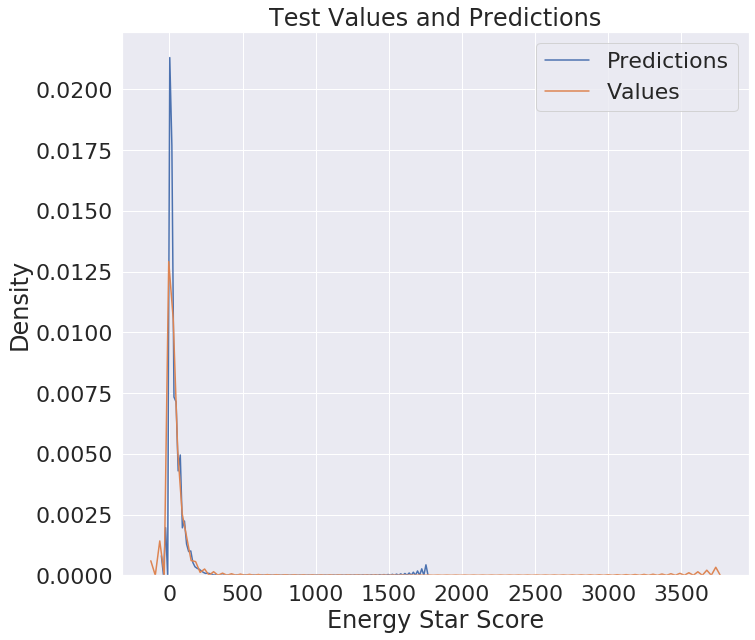

In [ ]:

figsize(10, 10)

# Density plot of the final predictions and the test values
sns.kdeplot(predictions, label = 'Predictions')
sns.kdeplot(y_test, label = 'Values')

# Label the plot
plt.xlabel('Energy Star Score'); plt.ylabel('Density');
plt.title('Test Values and Predictions');

In [ ]:
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X_5, y_5)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_mae = mae(y_test, model_pred)
    
    # Return the performance metric
    return model_mae

In [ ]:
lr = LinearRegression()
lr_mae = fit_and_evaluate(lr)

print('Linear Regression Performance on the test set: MAE = %0.4f' % lr_mae)

Linear Regression Performance on the test set: MAE = 13.6014


In [ ]:
svm = SVR(C = 1000, gamma = 0.1)
svm_mae = fit_and_evaluate(svm)

print('Support Vector Machine Regression Performance on the test set: MAE = %0.4f' % svm_mae)

In [ ]:
random_forest = RandomForestRegressor(random_state=60)
random_forest_mae = fit_and_evaluate(random_forest)

print('Random Forest Regression Performance on the test set: MAE = %0.4f' % random_forest_mae)

In [ ]:

knn = KNeighborsRegressor(n_neighbors=10)
knn_mae = fit_and_evaluate(knn)

print('K-Nearest Neighbors Regression Performance on the test set: MAE = %0.4f' % knn_mae)

In [ ]:

# Loss function to be optimized
loss = ['ls', 'lad', 'huber']

# Number of trees used in the boosting process
n_estimators = [100, 500, 900, 1100, 1500]

# Maximum depth of each tree
max_depth = [2, 3, 5, 10, 15]

# Minimum number of samples per leaf
min_samples_leaf = [1, 2, 4, 6, 8]

# Minimum number of samples to split a node
min_samples_split = [2, 4, 6, 10]

# Maximum number of features to consider for making splits
max_features = ['auto', 'sqrt', 'log2', None]

# Define the grid of hyperparameters to search
hyperparameter_grid = {'loss': loss,
                       'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

In [ ]:
# Create the model to use for hyperparameter tuning
model = GradientBoostingRegressor(random_state = 42)

# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=hyperparameter_grid,
                               cv=4, n_iter=10, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=42)

NameError: ignored

In [ ]:

# Fit on the training data
random_cv.fit(X_5, y_5)

NameError: ignored

In [ ]:

# Get all of the cv results and sort by the test performance
random_results = pd.DataFrame(random_cv.cv_results_).sort_values('mean_test_score', ascending = False)

random_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_loss,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
5,57.244069,6.301542,0.250206,0.048557,900,6,8,log2,5,lad,"{'n_estimators': 900, 'min_samples_split': 6, ...",-11.734762,-12.411564,-12.290043,-12.583943,-12.255078,0.318038,1,-10.479330,-10.290400,-10.380540,-10.264658,-10.353732,0.084319
3,162.820436,11.705865,0.105233,0.005579,500,6,8,None,5,huber,"{'n_estimators': 500, 'min_samples_split': 6, ...",-11.922165,-12.500306,-12.421249,-12.816819,-12.415135,0.320804,2,-9.951465,-9.764857,-9.802270,-9.639535,-9.789532,0.111235
9,123.160360,7.000139,0.078537,0.017688,500,4,2,auto,3,huber,"{'n_estimators': 500, 'min_samples_split': 4, ...",-11.990478,-12.521884,-12.479326,-12.811336,-12.450756,0.294851,3,-11.356917,-11.191408,-11.223124,-11.131682,-11.225783,0.082523
1,19.369055,0.204945,0.082406,0.002137,100,6,8,sqrt,10,huber,"{'n_estimators': 100, 'min_samples_split': 6, ...",-12.190931,-12.676974,-12.597778,-13.005343,-12.617757,0.289961,4,-9.301160,-9.313138,-9.251524,-9.185482,-9.262826,0.050276
4,188.107402,14.941616,0.618332,0.013941,900,6,6,sqrt,15,lad,"{'n_estimators': 900, 'min_samples_split': 6, ...",-12.085147,-12.762846,-12.660348,-13.056634,-12.641243,0.352472,5,-5.162314,-5.399150,-5.283648,-4.998902,-5.211004,0.148353
2,274.713173,6.984033,0.209300,0.005684,500,4,2,auto,10,huber,"{'n_estimators': 500, 'min_samples_split': 4, ...",-12.210490,-12.848547,-12.697203,-13.093958,-12.712549,0.322594,6,-4.546892,-3.789219,-4.788573,-4.637514,-4.440549,0.385829
8,218.684205,7.353012,0.767754,0.011193,1500,6,2,sqrt,10,huber,"{'n_estimators': 1500, 'min_samples_split': 6,...",-12.490585,-12.878522,-12.755257,-13.342845,-12.866802,0.308519,7,-2.133768,-2.286174,-2.246058,-2.180139,-2.211535,0.058729
0,39.796019,0.817690,0.038481,0.000936,100,2,6,auto,5,ls,"{'n_estimators': 100, 'min_samples_split': 2, ...",-12.561910,-12.934812,-13.150036,-13.240926,-12.971921,0.261522,8,-11.949210,-11.833873,-11.822282,-11.502627,-11.776998,0.165998
7,105.479730,10.611771,0.065259,0.000854,500,4,6,auto,3,ls,"{'n_estimators': 500, 'min_samples_split': 4, ...",-12.555366,-13.236948,-13.150668,-13.199550,-13.035633,0.278965,9,-11.855932,-11.943921,-11.696011,-11.416835,-11.728175,0.200521
6,371.053692,14.955782,1.298288,0.016394,1500,6,2,sqrt,15,huber,"{'n_estimators': 1500, 'min_samples_split': 6,...",-12.924622,-13.386802,-13.243016,-13.511830,-13.266568,0.219141,10,-0.822352,-0.906668,-0.800983,-0.741882,-0.817971,0.059085


In [ ]:
random_cv.best_estimator_

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='lad', max_depth=5,
                          max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=8, min_samples_split=6,
                          min_weight_fraction_leaf=0.0, n_estimators=900,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
r_pred = random_cv.predict(X_test)

print('Model performance on the test set:   MAE = %0.4f.' % mae(y_test, r_pred))

Model performance on the test set:   MAE = 12.0360.


In [ ]:

# Create a range of trees to evaluate
trees_grid = {'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]}

model = GradientBoostingRegressor(loss = 'lad', max_depth = 5,
                                  min_samples_leaf = 6,
                                  min_samples_split = 6,
                                  max_features = None,
                                  random_state = 42)

# Grid Search Object using the trees range and the random forest model
grid_search = GridSearchCV(estimator = model, param_grid=trees_grid, cv = 4, 
                           scoring = 'neg_mean_absolute_error', verbose = 1,
                           n_jobs = -1, return_train_score = True)

In [ ]:
# Fit the grid search
grid_search.fit(X_5, y_5)

Fitting 4 folds for each of 15 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of  60 | elapsed:  4.5min remaining:  1.9min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  6.1min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='lad', max_depth=5,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=6,
                                                 min_samples_split=6,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                

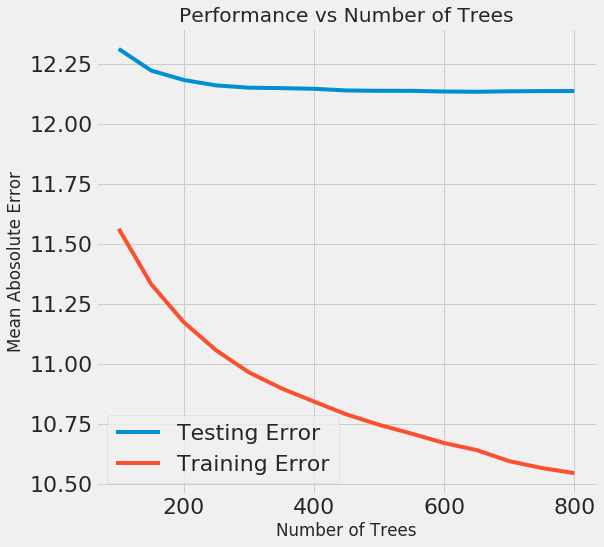

In [ ]:

# Get the results into a dataframe
results = pd.DataFrame(grid_search.cv_results_)

# Plot the training and testing error vs number of trees
figsize(8, 8)
plt.style.use('fivethirtyeight')
plt.plot(results['param_n_estimators'], -1 * results['mean_test_score'], label = 'Testing Error')
plt.plot(results['param_n_estimators'], -1 * results['mean_train_score'], label = 'Training Error')
plt.xlabel('Number of Trees'); plt.ylabel('Mean Abosolute Error'); plt.legend();
plt.title('Performance vs Number of Trees');

In [ ]:
results.sort_values('mean_test_score', ascending = False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
11,220.903399,2.023533,0.129313,0.004805,650,{'n_estimators': 650},-11.678848,-12.274011,-12.100016,-12.483503,-12.134095,0.295835,1,-10.647953,-10.593560,-10.662019,-10.660271,-10.640951,0.027893
10,224.507829,2.072041,0.123259,0.005000,600,{'n_estimators': 600},-11.681919,-12.278738,-12.092899,-12.487141,-12.135174,0.296529,2,-10.678439,-10.625982,-10.689397,-10.687770,-10.670397,0.025982
12,227.644271,3.483374,0.135372,0.005809,700,{'n_estimators': 700},-11.680248,-12.278411,-12.103950,-12.481895,-12.136126,0.295238,3,-10.577537,-10.549849,-10.633474,-10.618447,-10.594827,0.033066
13,227.065523,5.207277,0.142165,0.005786,750,{'n_estimators': 750},-11.684511,-12.278066,-12.107081,-12.478794,-12.137113,0.292559,4,-10.551664,-10.526463,-10.617175,-10.569583,-10.566221,0.033167
14,218.750636,7.710153,0.150350,0.005596,800,{'n_estimators': 800},-11.686444,-12.279511,-12.107891,-12.475130,-12.137244,0.290899,5,-10.523682,-10.510384,-10.589150,-10.556820,-10.545009,0.030585


In [ ]:
# Default model
default_model = GradientBoostingRegressor(random_state = 42)

# Select the best model
final_model = grid_search.best_estimator_

final_model

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='lad', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=6, min_samples_split=6,
                          min_weight_fraction_leaf=0.0, n_estimators=650,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
#default_pred = default_model.predict(X_test)
final_pred = final_model.predict(X_test)

#print('Default model performance on the test set: MAE = %0.4f.' % mae(y_test, default_pred))
print('Final model performance on the test set:   MAE = %0.4f.' % mae(y_test, final_pred))

Final model performance on the test set:   MAE = 11.9489.


In [ ]:
# Create the model
gradient_boosted_final = GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='lad', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=6, min_samples_split=6,
                          min_weight_fraction_leaf=0.0, n_estimators=650,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

# Fit the model on the training data
gradient_boosted_final.fit(X_20, y_20)

# Make predictions on the test data
predictions = gradient_boosted.predict(X_test)

# Evaluate the model
mae_p = np.mean(abs(predictions - y_test))

print('Gradient Boosted Performance on the test set: MAE = %0.4f' % mae_p)